<a href="https://colab.research.google.com/github/Marcin19721205/MachineLearingBootCampPartII/blob/main/05_dbscan01MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DBSCAN

#Density-Based-Spatial-Clustering-With_Noise

#grupuje i wydobywa outliery


### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych i wizualizacja](#1)
3. [DBSCAN](#2)
4. [DBSCAN - wizualizacja](#3)
5. [DBSCAN - 4 klastry](#4)

### <a name='0'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

### <a name='1'></a> Wygenerowanie danych i wizualizacja

In [2]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=1000, centers=3, cluster_std=1.2, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
px.scatter(df, 'x1', 'x2', width=950, height=500, title='Klasteryzacja', template='plotly_dark')

### <a name='2'></a> DBSCAN

In [3]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=0.5, min_samples=5) #eps - promien, min
cluster.fit(data)

DBSCAN()

In [4]:
cluster.labels_[:10]

array([0, 0, 1, 2, 2, 0, 1, 1, 1, 1])

### <a name='3'></a> DBSCAN - wizualizacja
eps - promien w ktorym będą szukani sąsiedzi
min_samples - ile w tym eps musi być sąsiadów

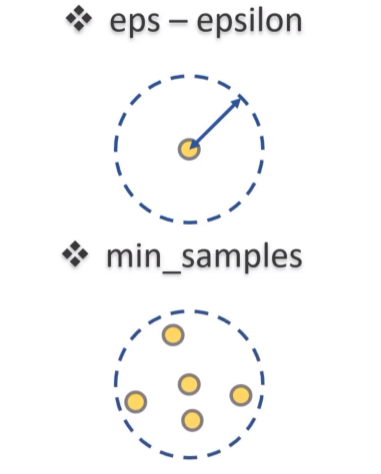

In [5]:
df['cluster'] = cluster.labels_
px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, title='DBSCAN(eps=0.5, min_samples=5)',
           template='plotly_dark', color_continuous_midpoint=0)

In [6]:
cluster = DBSCAN(eps=0.5, min_samples=7)
cluster.fit(data)

df['cluster'] = cluster.labels_
px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, title='DBSCAN(eps=0.5, min_samples=7)',
           template='plotly_dark')

In [7]:
cluster = DBSCAN(eps=0.8, min_samples=5)
cluster.fit(data)

df['cluster'] = cluster.labels_
px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, title='DBSCAN(eps=0.7, min_samples=5)', template='plotly_dark')

### <a name='4'></a> DBSCAN - 4 klastry

In [8]:
data = make_blobs(n_samples=1000, centers=4, cluster_std=1.2, center_box=(-8.0, 8.0), random_state=43)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
px.scatter(df, 'x1', 'x2', width=950, height=500, title='DBSCAN', template='plotly_dark')

In [9]:
cluster = DBSCAN(eps=0.5, min_samples=5)
cluster.fit(data)

df['cluster'] = cluster.labels_
px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, title='DBSCAN(eps=0.5, min_samples=5)', template='plotly_dark')

In [10]:
df.cluster.value_counts()

,count
cluster,
1,228
0,223
2,221
3,210
-1,93
6,7
4,5
8,5
5,4


Punkty graniczne, które są osiągalne z więcej niż jednego klastra, mogą być częścią każdego klastra, w zależności od kolejności przetwarzania danych. Taka sytuacja ma niewielki wpływ na wynik klastrowania.

In [11]:
cluster = DBSCAN(eps=0.8, min_samples=5)
cluster.fit(data)

df['cluster'] = cluster.labels_
px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, title='DBSCAN(eps=0.8, min_samples=5)', template='plotly_dark')

In [12]:
cluster = DBSCAN(eps=0.6, min_samples=6)
cluster.fit(data)

df['cluster'] = cluster.labels_
px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, title='DBSCAN(eps=0.6, min_samples=6)', template='plotly_dark')

#Softsensor

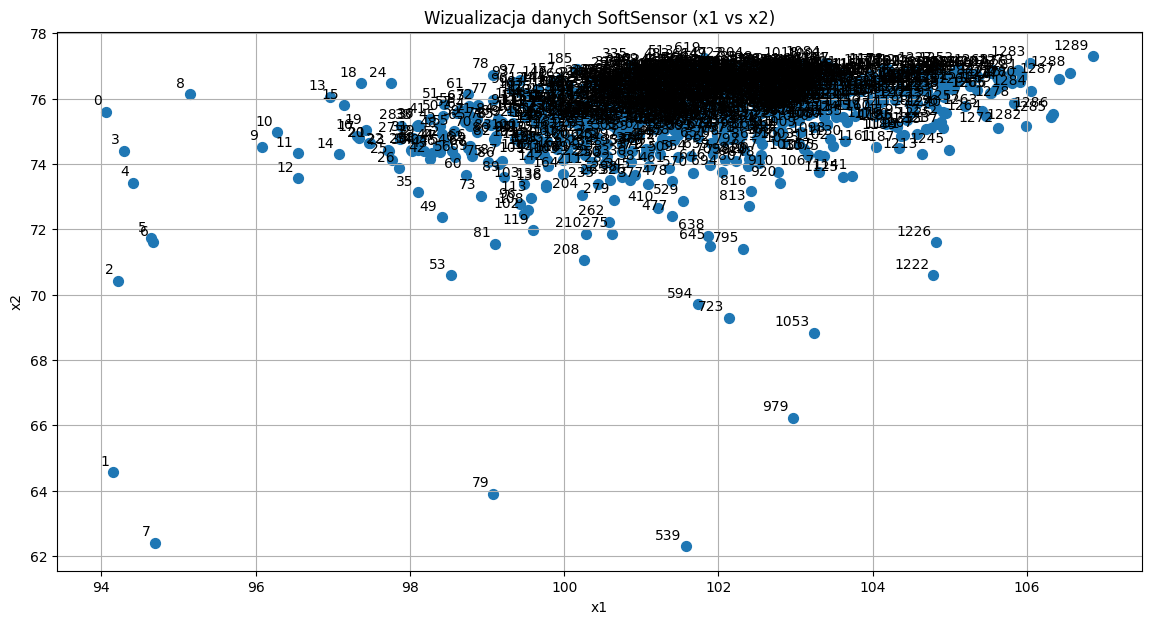

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z prawidłowym separatorem
df_soft = pd.read_csv("/content/sample_data/SoftSensor.csv", delimiter=';')
df = df_soft.rename(columns={'Zasadowosc': 'x1', 'Wyd_sodowa': 'x2'})

# Podgląd
df.head()

# --- Rysowanie poprawione ---
plt.figure(figsize=(14,7))
plt.scatter(df['x1'], df['x2'], s=50)

# Dodanie etykiet punktów
for idx, (x, y) in enumerate(zip(df['x1'], df['x2'])):
    plt.annotate(
        str(idx),          # numer punktu
        xy=(x, y),
        xytext=(-3, 3),
        textcoords='offset points',
        ha='right',
        va='bottom'
    )

plt.title("Wizualizacja danych SoftSensor (x1 vs x2)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

#Wycinamy outliery - najlepsza metoda

In [31]:
cluster = DBSCAN(eps=0.8, min_samples=20)
cluster.fit(df)

df['cluster'] = cluster.labels_
px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, title='DBSCAN(eps=0.1, min_samples=10)-najczęściej spotykane', template='plotly_dark')

In [20]:
cluster = DBSCAN(eps=0.1, min_samples=10)
cluster.fit(df)

df['cluster'] = cluster.labels_
px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, title='DBSCAN(eps=0.1, min_samples=10)-najczęściej spotykane', template='plotly_dark')